In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
from decimal import Decimal

In [2]:
def Qrot(file_Q, Trot):
    '''Finds Q(Trot) for a given Trot, using information in file_Q'''
    qdata=np.loadtxt(file_Q, skiprows=2)
    x = [np.log(i[0]) for i in qdata] # log(temp)
    y = [np.log(i[1]) for i in qdata] #log(Q(temp))
    fit, _ = np.polyfit(x, y, 1, cov=True)
    log_Q = fit[0]*np.log(Trot)+fit[1]
    Q = np.exp(log_Q)
    return Q 

In [3]:
def rotational_diagram(file_in,file_Q):
    '''Calculates Trot and N from a rotational diagram. Data points are in file_in. Uses file_Q to derive Q(rot).'''
    fname = file_in
    data=np.loadtxt(fname, skiprows=1)
        
    x = [i[0] for i in data] # Eup in Kelvin
    y = [i[1] for i in data] # log(Nu/gu)
    E_y = [i[2] for i in data] # Err(log(Nu/gu))

    # lets fit linear (a*x+b)
    fit, var = np.polyfit(x, y, 1, w=1/np.array(E_y), cov=True)
    x_fit = np.linspace(200,550,10)
    y_fit = fit[0]*x_fit+fit[1]
    a = fit[0]
    b = fit[1]
    E_a = np.sqrt(var[0,0])
    E_b = np.sqrt(var[1,1])

    # deriving parameters
    Trot = -1/a #K
    E_Trot = E_a/a**2
    Q = Qrot(file_Q, Trot)
    N = Q * np.exp(b)
    E_N = Q * E_b * np.exp(b)
    
    return [Trot,E_Trot], [N, E_N], fit, [x,y,E_y]

In [77]:
def plot_diagram(data, Trot, N, fit, f, label, file_out, limits, color):
    '''Draw the rotational diagram.'''
    x = data[0]
    y = data[1]
    E_y = data[2]
    T_val = Trot[0]
    T_err = Trot[1]
    N_val = N[0]
    N_err = N[1]
    space = 10
    left=limits[0]
    bot=limits[2]
    right=limits[1]
    top=limits[3]
    x_fit = np.linspace(left,right,100)
    y_fit = fit[0]*x_fit+fit[1]
    label_plot=f'Trot = ({round(T_val,1)} $\pm$ {round(T_err,1)}) K \n N = ({round(N_val/f,1)} $\pm$ {round(N_err/f,1)})' + f'{Decimal(f):.0E}'[-4:] + ' cm$^-$$^2$'
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_xlim(left, right)
    ax.set_ylim(bot,top)
    ax.set_xlabel('Eup/k (K)',fontsize=30)
    ax.set_ylabel('Ln (Nu/gu)',fontsize=30)
    for axis in ['top','bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(3)
    ax.tick_params(right=True, top=True, direction='in',labelsize=23, width=2,length=10)
    ax.plot(x_fit,y_fit,'--'+color,label=label_plot,lw=5)
    ax.errorbar(x, y, xerr=None,yerr=E_y, fmt='o'+color,capsize=3,ms=10,label=label)
    ax.legend(fontsize=30)
    plt.savefig(file_out,bbox='tight')

In [76]:
def make(data_in, file_Q, f, label, limits, color):
    file_out=data_in[:-4]+'.png'
    trot, n, fit, data = rotational_diagram(data_in,file_Q)
    plot_diagram(data, trot, n, fit, f, label, file_out, limits, color)

# CH3OCHO

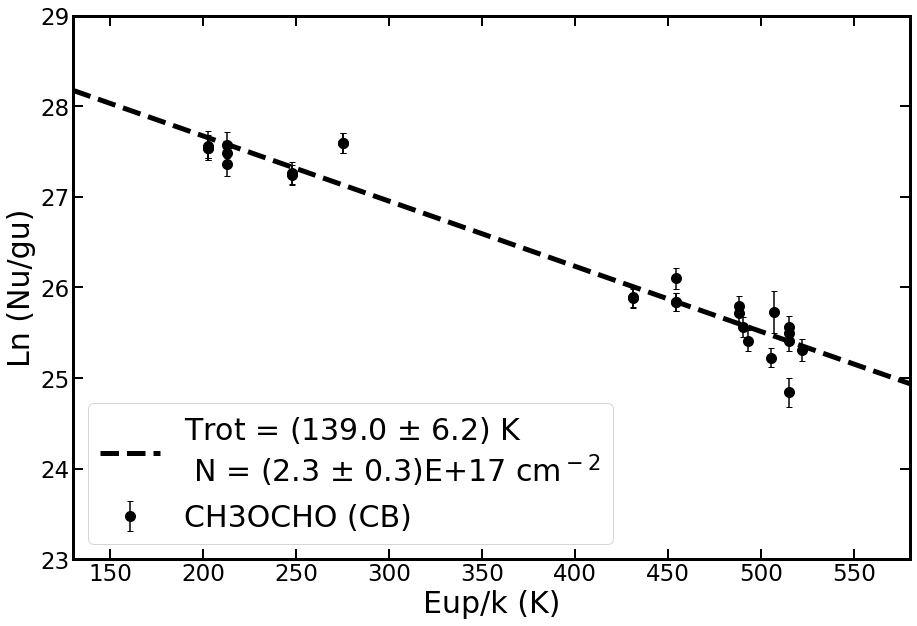

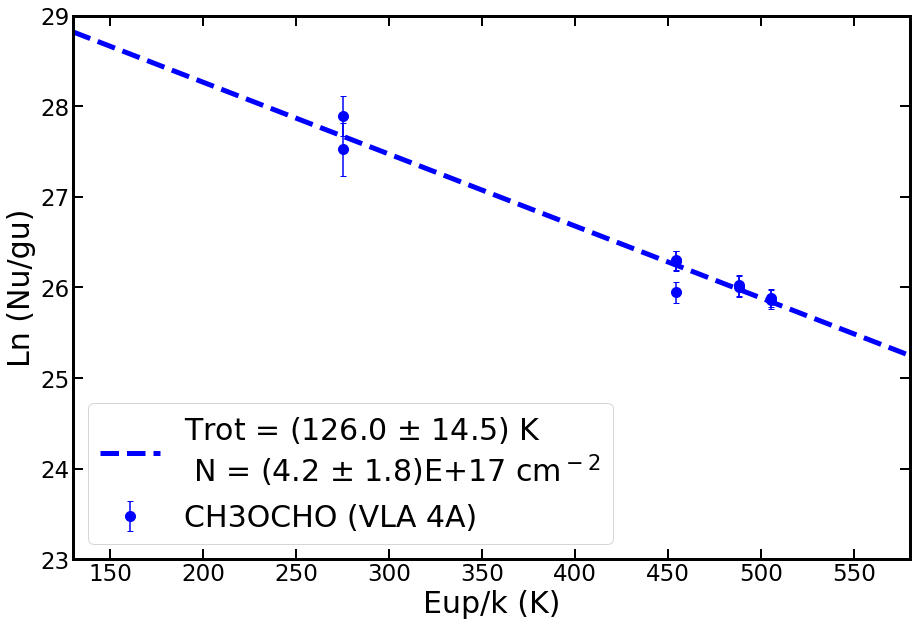

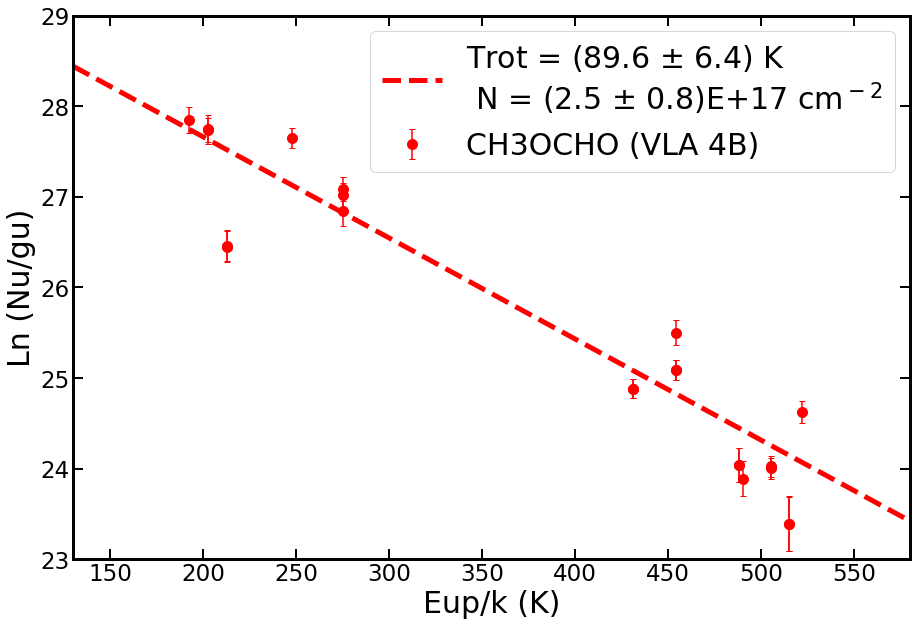

In [78]:
qfile='60003.txt' #file with info on Q(Trot)
f = 10**17
make('CH3OCHO-Center.dat', qfile, f, 'CH3OCHO (CB)', [130,580,23,29],'k')
make('CH3OCHO-A.dat', qfile, f, 'CH3OCHO (VLA 4A)', [130,580,23,29], 'b')
make('CH3OCHO-B.dat', qfile, f, 'CH3OCHO (VLA 4B)', [130,580,23,29],'r')

# CH2DOH

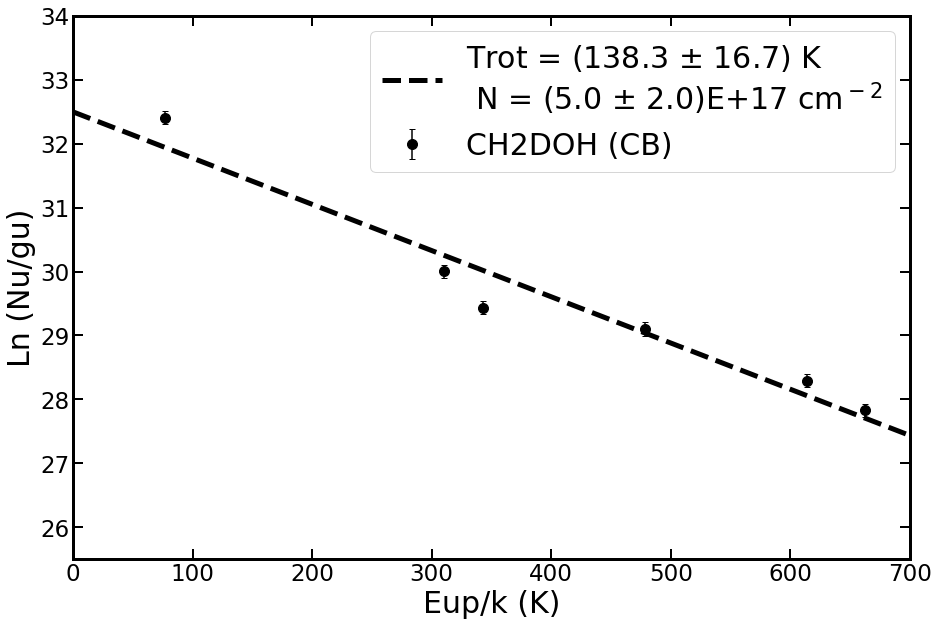

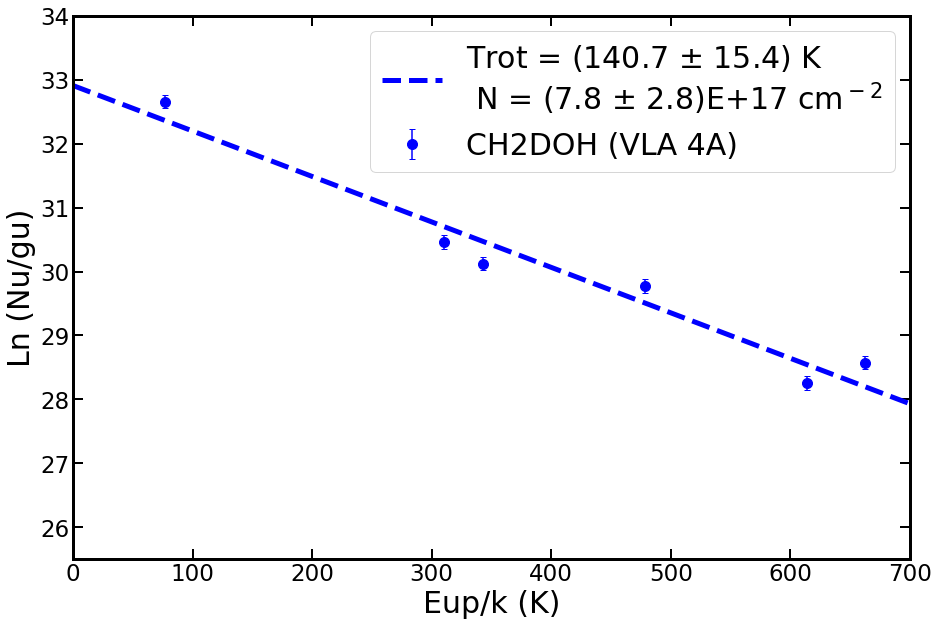

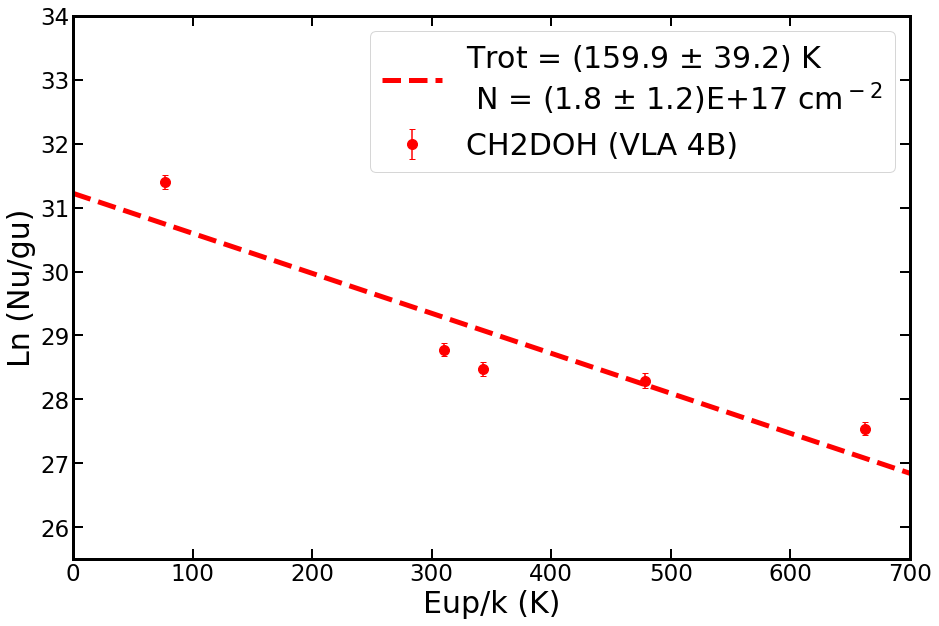

In [79]:
qfile='33004.txt' #file with info on Q(Trot)
molec = 'CH2DOH'
f = 10**17
lim = [0,700,25.5,34]
make(molec+'-Center.dat', qfile, f, molec+' (CB)', lim,'k')
make(molec+'-A.dat', qfile, f, molec+' (VLA 4A)', lim, 'b')
make(molec+'-B.dat', qfile, f, molec+' (VLA 4B)', lim, 'r')

# aGg'glycol

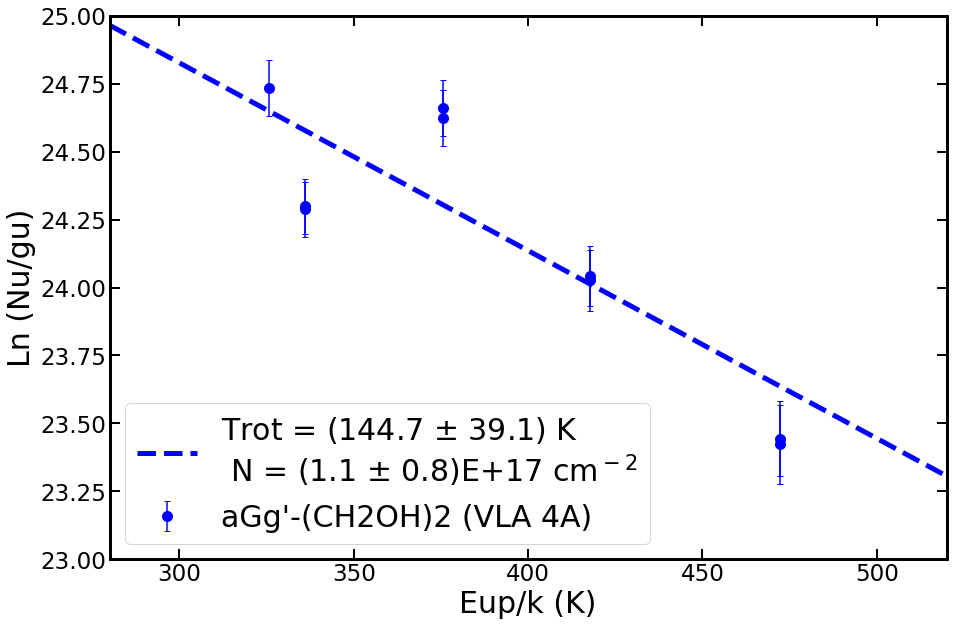

In [82]:
qfile='62503.txt' #file with info on Q(Trot)
molec = "aGg'glycol"
f = 10**17
lim = [280,520,23,25]
make(molec+'-A.dat', qfile, f, "aGg'-(CH2OH)2 (VLA 4A)", lim, 'b' )